# Pré-processamento dos dados

In [1]:
# Importando as bibliotecas 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Carregando o arquivo 
# O dataset contém 43 colunas: 42 features + label
dataset = pd.read_csv("../Dados/method-level.csv")

textClassColumn = dataset["CLASS"].copy()

# Tratamento da label: No smell (0), AR (1), ET (2), CTL (3), VT (4) 
dataset['CLASS'] = dataset['CLASS'].replace('No',0)
dataset['CLASS'] = dataset['CLASS'].replace('AR',1)
dataset['CLASS'] = dataset['CLASS'].replace('ET',2)
dataset['CLASS'] = dataset['CLASS'].replace('CTL',3)
dataset['CLASS'] = dataset['CLASS'].replace('VT',4)

# Drop caminho do arquivo
dataset = dataset.drop(['Method'], axis=1)

In [3]:
# Substituindo NaNs por media dos valores da coluna
allColumnsWithoutLabel = dataset.columns[:-1]
#for column in allColumnsWithoutLabel:
#    dataset[column] = dataset[column].fillna(dataset[column].mean())

In [4]:
# Descriptive statistics
dataset.describe()

,cbo,wmc,rfc,loc,variablesQty,methodsInvokedQty,methodsInvokedLocalQty,methodsInvokedIndirectLocalQty,stringLiteralsQty,numbersQty,assignmentsQty,maxNestedBlocksQty,uniqueWordsQty,CLASS
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,4.638723,1.656687,7.762475,15.011976,3.506986,7.762475,0.461078,0.538922,4.818363,2.778443,4.143713,0.481038,21.083832,2.019960
std,3.315301,1.364515,7.326764,13.503179,3.908766,7.326764,0.580502,0.751653,7.183380,5.445807,4.603836,0.752423,11.253842,1.416898
min,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,3.000000,1.000000,3.000000,6.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000
50%,4.000000,1.000000,6.000000,9.000000,2.000000,6.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,20.000000,2.000000
75%,5.000000,2.000000,10.000000,21.000000,5.000000,10.000000,1.000000,1.000000,6.000000,3.000000,6.000000,1.000000,27.000000,3.000000
max,21.000000,13.000000,55.000000,68.000000,24.000000,55.000000,3.000000,6.000000,44.000000,67.000000,26.000000,5.000000,67.000000,4.000000


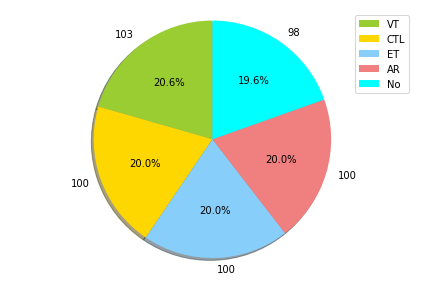

In [4]:
# Balanceamento da quantidade de instâncias em relação às classes
temp = textClassColumn.value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan']
patches, texts, percTexts = plt.pie(sizes, colors=colors, labels=sizes , shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

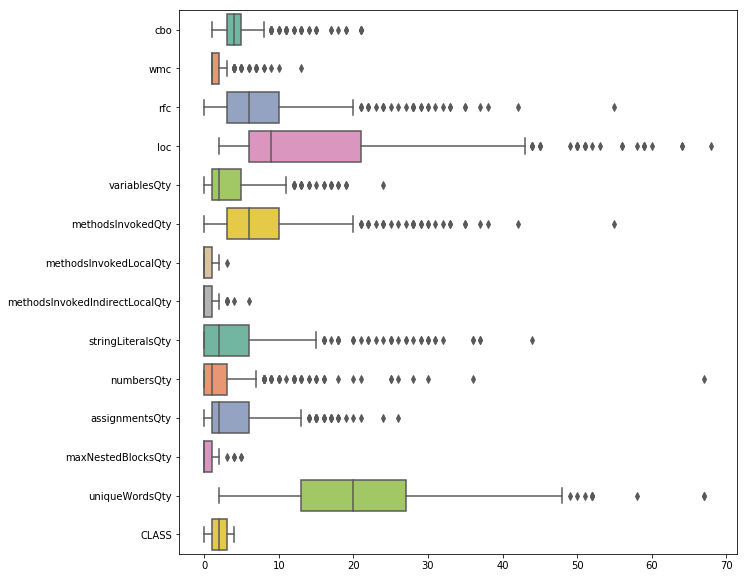

In [6]:
# Boxplot de todo o dataset
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.boxplot(data=dataset, orient="h", palette="Set2")

In [5]:
# Outliers imputation tecnique utilizando outliers do boxplot
def imputation():
    for column in allColumnsWithoutLabel:
        remove_out = np.where(np.in1d(dataset[column], 
                                    boxplot_stats(dataset[column]).pop(0)['fliers']))
        dataset.loc[remove_out[0], column] = dataset[column].mean()

# Imputation Luana
def imputation2():
    for column in allColumnsWithoutLabel:
        outliers_index_list = np.where(np.in1d(dataset[column], boxplot_stats(dataset[column]).pop(0)['fliers']))
        q3 = dataset[column].quantile(0.9)
        q1 = dataset[column].quantile(0.1)
        for i in outliers_index_list[0]:
            instance_value = dataset[column].loc[i]
            if instance_value > q3:
                print(instance_value, "to", q3)
                dataset[column] = dataset[column].replace(instance_value, q3)
            if instance_value < q1:
                dataset[column] = dataset[column].replace(instance_value, q1)

# Imputation considerando substituição de maximo e minimo nos outliers
def imputation3():
    for column in allColumnsWithoutLabel:
        index = 0
        count = 0
        mean = 0

        outliers_list = np.where(np.in1d(dataset[column], boxplot_stats(dataset[column]).pop(0)['fliers']))
        datasetWithoutOutliers = dataset.drop(dataset.index[[outliers_list[0]]])
        maxValue = datasetWithoutOutliers[column].max() - 1
        minValue = datasetWithoutOutliers[column].min() + 1
        for i in outliers_list[0]:
            instanceValue = dataset.loc[i, column]
            if(instanceValue > maxValue):
                dataset.loc[i, column] = maxValue
            elif(instanceValue < minValue):
                dataset.loc[i, column] = minValue

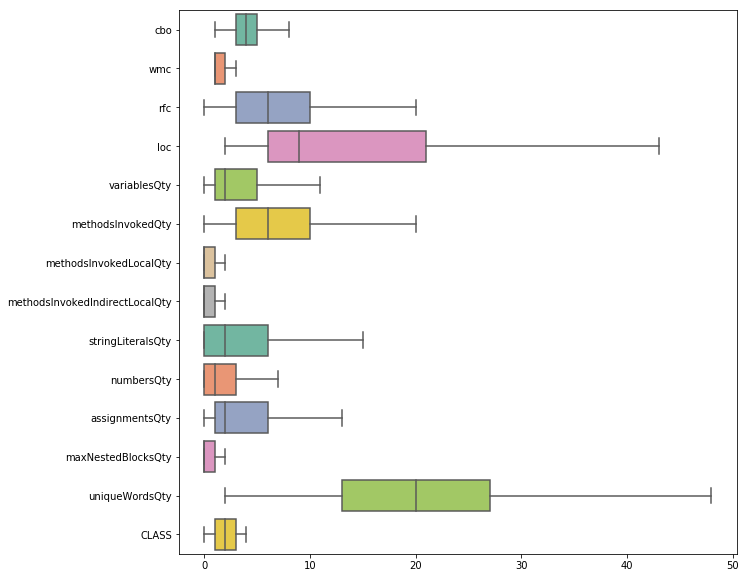

In [6]:
# Aplicando Imputation
imputation3()

# Boxplot de todo o dataset
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.boxplot(data=dataset, orient="h", palette="Set2")

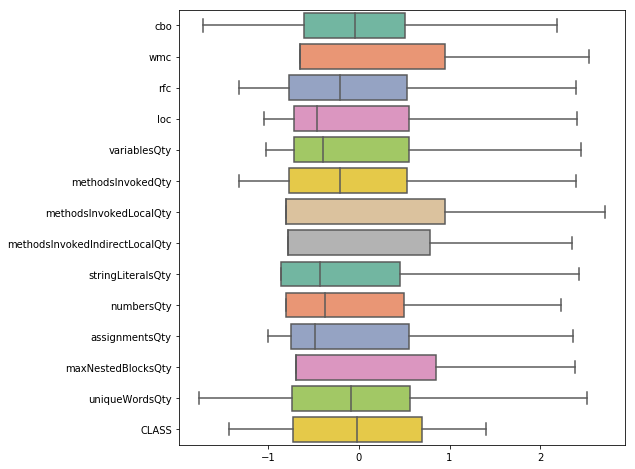

In [7]:
# Normalizando dataset e plotando boxplot novamente
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().fit(dataset)
scaler = StandardScaler().fit(dataset)
norm_subset = pd.DataFrame(scaler.transform(dataset), columns = dataset.columns)
a = round(norm_subset.describe(), 2)

fig, ax = plt.subplots(figsize=(8,8)) 
ax = sns.boxplot(data=norm_subset, orient="h", palette="Set2")

[Text(0.5, 0, 'cbo'),
 Text(1.5, 0, 'wmc'),
 Text(2.5, 0, 'rfc'),
 Text(3.5, 0, 'loc'),
 Text(4.5, 0, 'variablesQty'),
 Text(5.5, 0, 'methodsInvokedQty'),
 Text(6.5, 0, 'methodsInvokedLocalQty'),
 Text(7.5, 0, 'methodsInvokedIndirectLocalQty'),
 Text(8.5, 0, 'stringLiteralsQty'),
 Text(9.5, 0, 'numbersQty'),
 Text(10.5, 0, 'assignmentsQty'),
 Text(11.5, 0, 'maxNestedBlocksQty'),
 Text(12.5, 0, 'uniqueWordsQty'),
 Text(13.5, 0, 'CLASS')]

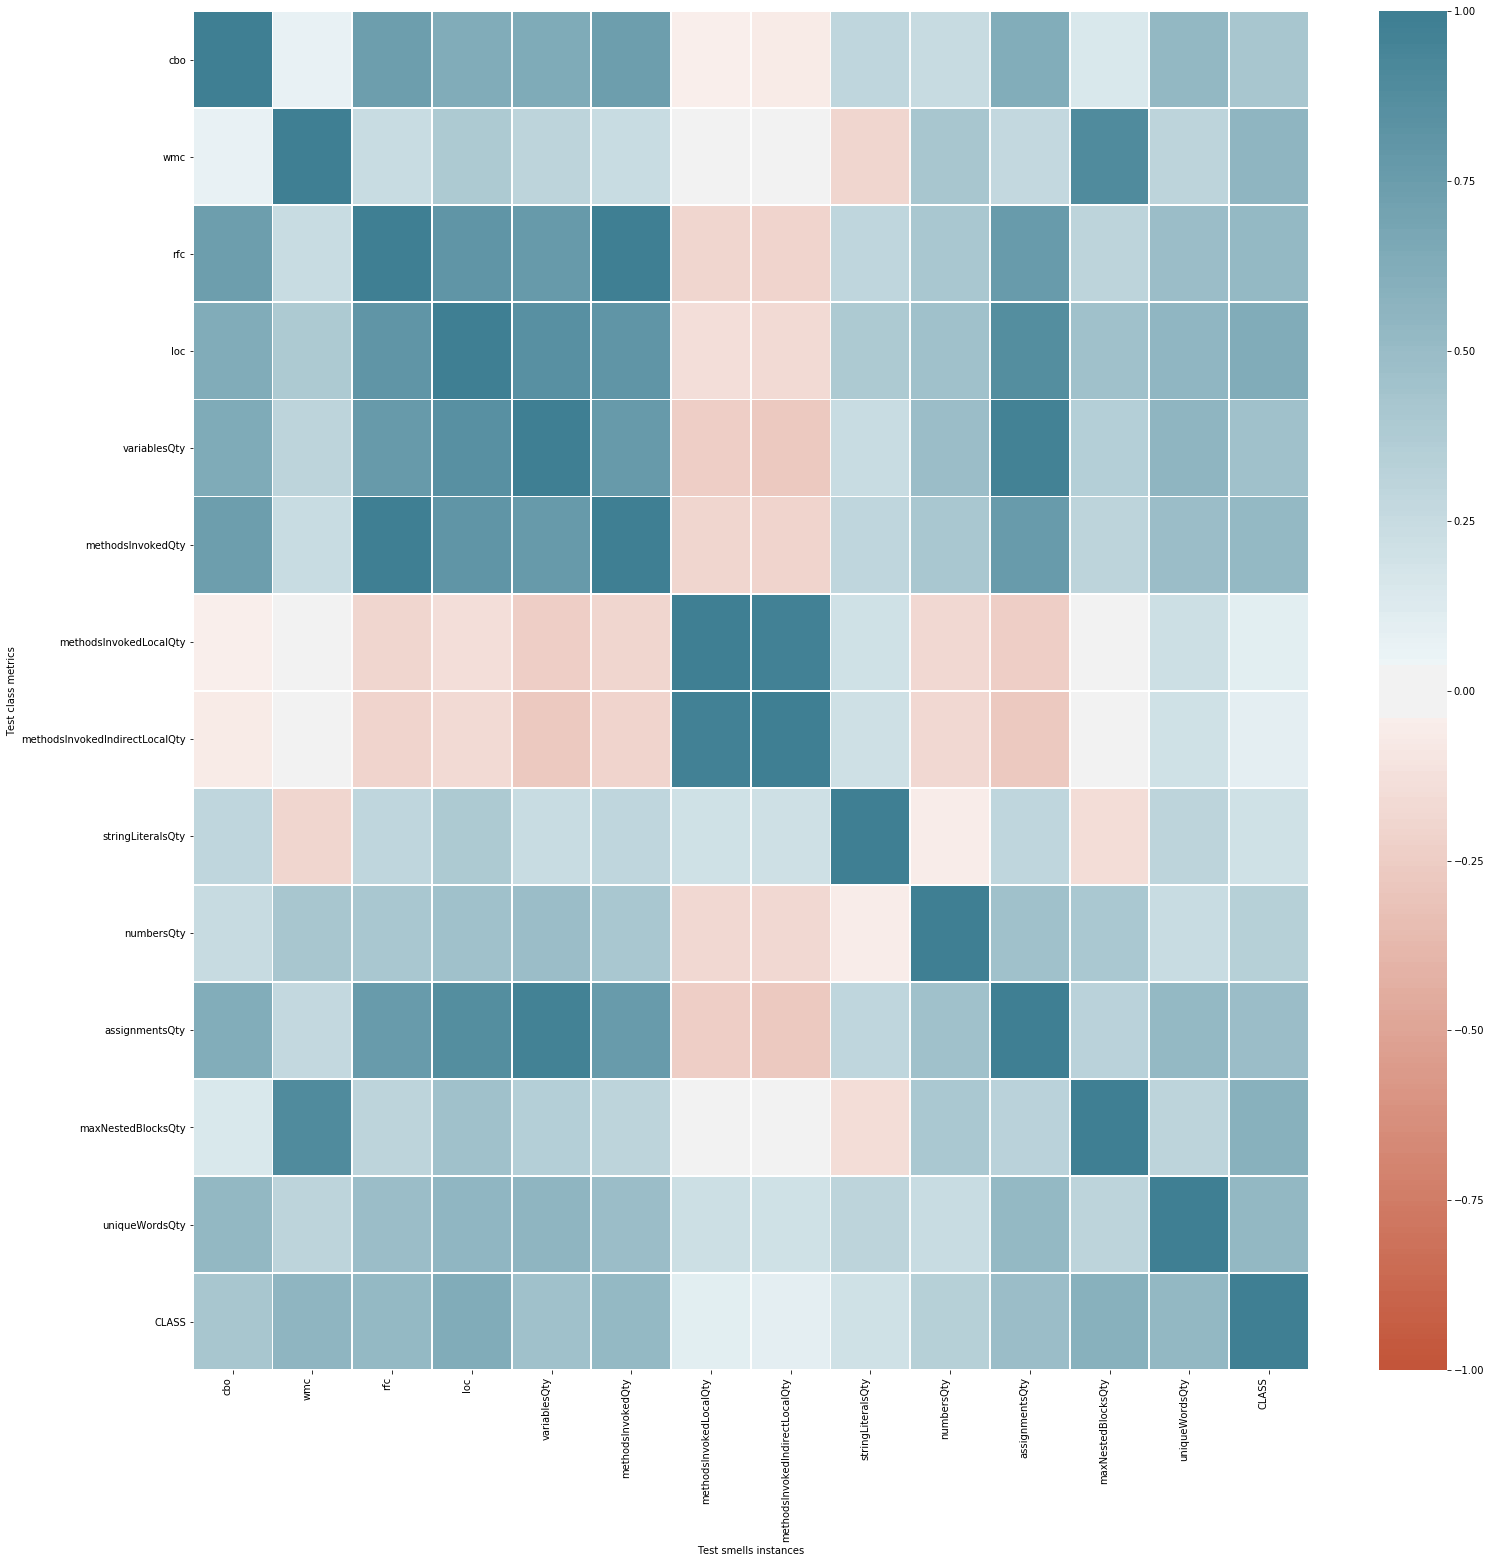

In [10]:
# Só vendo as correlações
#corr = norm_subset.corr(method='spearman').iloc[0:42, 42:]
corr = dataset.corr(method='spearman')

fig, ax = plt.subplots(figsize=(25,25))
    
ax = sns.heatmap(
    corr, 
    linewidths=.8,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot=False
)
plt.ylabel('Test class metrics')
plt.xlabel('Test smells instances')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

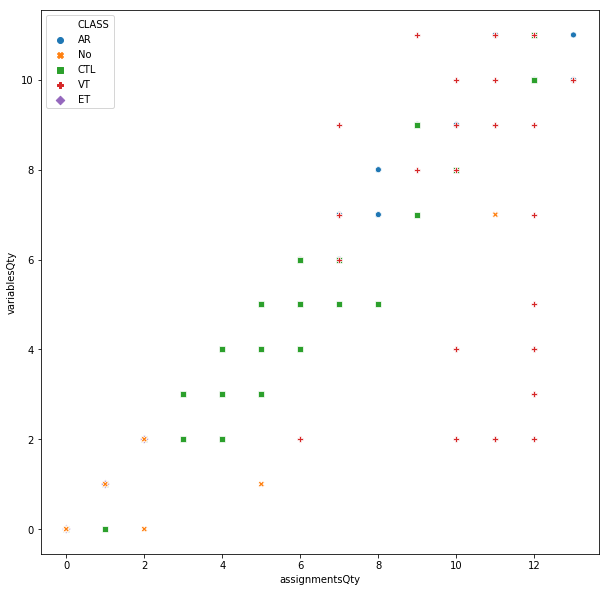

In [11]:
# Distribuição das instâncias considerando as classes
temp = dataset.copy()
temp['CLASS'] = textClassColumn
# Imprimindo o Scatter plot para analisar a distribuição das classes das instâncias
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="assignmentsQty", y="variablesQty", data=temp, hue="CLASS", style="CLASS", ax=ax)

# Separando dataset para treinamento e teste

In [8]:
# Atualizando classe dos dados normalizados com a classe original
norm_subset["CLASS"] = dataset["CLASS"]

# Dividindo o dataset para treinamento
from sklearn.model_selection import train_test_split
class_column = norm_subset['CLASS']
norm_subset = norm_subset.drop(['CLASS'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(norm_subset, class_column, test_size=0.1, random_state=70, 
                                                 stratify=class_column, shuffle=True)
print(dataset.shape)
print(X_train.shape)
print(X_test.shape)

(501, 14)
(450, 13)
(51, 13)


# Escolhendo os melhores parâmetros

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

def takeBestParams(classifier, param_grid):
    kfold = model_selection.KFold(n_splits=10)
    #Gridsearch para testar o melhor valor para o parametro
    classifier_gscv = GridSearchCV(classifier, param_grid, cv=kfold, n_jobs=3)
    #Executando teste
    classifier_gscv.fit(X_train, y_train)
    # Imprimindo resultado dos melhores parametros
    return classifier_gscv.best_params_, classifier_gscv.best_score_

## KNN

In [257]:
# Criando um novo modelo KNN
knn = KNeighborsClassifier()
# Dicionario contendo o parametro que queremos testar (utilizando metricas para valores reais)
# Referência para metrica: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
param_grid = {'n_neighbors': np.arange(2, 25), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'p': [1,2]}
takeBestParams(knn, param_grid)

({'metric': 'manhattan', 'n_neighbors': 5, 'p': 1}, 0.8466666666666667)

## DWNN

In [259]:
# Criando um novo modelo DWNN
dwnn = KNeighborsClassifier(weights="distance")
# Dicionario contendo o parametro que queremos testar (utilizando metricas para valores reais)
# Referência para metrica: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
param_grid = {'n_neighbors': np.arange(2, 25), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'p': [1,2]}
takeBestParams(dwnn, param_grid)

({'metric': 'manhattan', 'n_neighbors': 2, 'p': 1}, 0.8866666666666667)

## Logistic Regression (Ovr)

In [255]:
# Criando um novo modelo Logistic Regression
logRegressionOvr = LogisticRegression(multi_class='ovr')
# Dicionario contendo o parametro que queremos testar
# Solver: algoritmo a ser usado no problema de otimização
param_grid = {'solver': ['newton-cg', 'sag', 'saga', 'lbfgs', 'liblinear']}
takeBestParams(logRegressionOvr, param_grid)

({'solver': 'liblinear'}, 0.84)

## Logistic Regression (Multinomial)

In [254]:
# Criando um novo modelo Logistic Regression
logRegressionMultinomial = LogisticRegression(multi_class='multinomial')
# Dicionario contendo o parametro que queremos testar
# Solver: algoritmo a ser usado no problema de otimização
param_grid = {'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}
takeBestParams(logRegressionMultinomial, param_grid)

({'solver': 'newton-cg'}, 0.8511111111111112)

## Decision Tree

In [261]:
#Analise sobre o gini vs entropy https://quantdare.com/decision-trees-gini-vs-entropy/ (mais rápido Gini, melhor resultado Entropy)
# Criando um novo modelo DecisionTree
decisionTree = DecisionTreeClassifier()
# Dicionario contendo o parametro que queremos testar
# A poda não foi necessário porque o dataset não é tão grande e não demora muito para encontrar um resultado
param_grid = {'criterion': ['gini', 'entropy'], 'random_state': np.arange(0, 100)}
takeBestParams(decisionTree, param_grid)

({'criterion': 'entropy', 'random_state': 56}, 0.8888888888888888)

## Random Forest

In [252]:
# Criando um novo modelo RandomForest
randomForest = RandomForestClassifier()
# Dicionario contendo o parametro que queremos testar
param_grid = {'criterion': ['gini', 'entropy'], 'random_state': np.arange(0, 100)}
takeBestParams(randomForest, param_grid)

({'criterion': 'entropy', 'random_state': 22}, 0.9066666666666666)

In [250]:
# Criando um novo modelo RandomForest weighted
randomForest = RandomForestClassifier(class_weight="balanced_subsample")
# Dicionario contendo o parametro que queremos testar
param_grid = {'criterion':['gini', 'entropy'], 'random_state': np.arange(0, 100)}
takeBestParams(randomForest, param_grid)

({'criterion': 'gini', 'random_state': 24}, 0.9088888888888889)

In [24]:
# Criando um novo modelo Gaussiano
naive = GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
takeBestParams(naive, param_grid)

({'var_smoothing': 0.0015199110829529332}, 0.7777777777777778)

## SVM

In [13]:
# Função de decisão one-vs-one utilizada para multiclass
# https://scikit-learn.org/stable/modules/svm.html
svm = SVC(decision_function_shape="ovo")
# Dicionario contendo o parametro que queremos testar
param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
takeBestParams(svm, param_grid)

({'kernel': 'rbf'}, 0.8644444444444445)

In [192]:
#scores = []
#for i in range(0, 100):
#    mean = 0
#    for j in range(10):
#        randomForest = RandomForestClassifier(class_weight="balanced", random_state=i)
#        randomForest.fit(X_train, y_train)
#        score = randomForest.score(X_test, y_test)
#        mean += score
#    mean /= 10
#    scores.append((mean, i))
#print(scores)
#print(max(scores))

# Aplicando algoritmos de classificação

In [ ]:
# É melhor o algoritmo errar quando era para não ter test smell e ele disse que tem, do que ter e ele disse que não tem

In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix

# Preparando os modelos
estimators = []
model1 = LogisticRegression(multi_class='multinomial', solver="newton-cg")
estimators.append(('LRM', model1))
model2 = LogisticRegression(multi_class='multinomial', solver="newton-cg", class_weight="balanced")
estimators.append(('WLRM', model2))
model3 = LogisticRegression(multi_class='ovr', solver="liblinear")
estimators.append(('LRO', model3))
model4 = KNeighborsClassifier(n_neighbors = 5, metric="manhattan")
estimators.append(('KNN', model4))
model5 = DecisionTreeClassifier(criterion="entropy", random_state=56)
estimators.append(('TREE', model5))
model6 = DecisionTreeClassifier(criterion="entropy", class_weight="balanced", random_state=41)
estimators.append(('WTREE', model6))
model7 = SVC(decision_function_shape="ovo", kernel="rbf")
estimators.append(('SVM', model7))
model8 = KNeighborsClassifier(n_neighbors = 2, weights="distance", metric="manhattan")
estimators.append(('DWNN', model8))
model9 = RandomForestClassifier(criterion="entropy", random_state=22)
estimators.append(('RFRT', model9))
model10 = RandomForestClassifier(class_weight="balanced_subsample", criterion="gini", random_state=24)
estimators.append(('WRFRT', model10))
model11 = GaussianNB(var_smoothing=0.0015199110829529332)
estimators.append(('NAIVE', model11))

#ensemble = VotingClassifier(estimators)
#results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)

# Verificando score de todos so modelos
results = []
names = []
rskfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=30)
skfold = model_selection.StratifiedKFold(n_splits=10, random_state=30)
for name, model in estimators:
    y_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skfold)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=rskfold)
    conf_mat = confusion_matrix(y_train, y_pred)
    results.append(cv_results)
    names.append(name)
    print("%s: media %f | DP %f | Max %f" % (name, cv_results.mean(), cv_results.std(), cv_results.max()))
    print("Matriz de confusão")
    print(conf_mat, "\n")

LRM: media 0.846665 | DP 0.049145 | Max 0.955556
Matriz de confusão
[[69  9  9  0  1]
 [ 5 78  0  2  5]
 [ 3  0 84  3  0]
 [ 0  0  3 78  9]
 [ 4  8  0  9 71]] 

WLRM: media 0.845941 | DP 0.049283 | Max 0.955556
Matriz de confusão
[[69  9  9  0  1]
 [ 5 78  0  2  5]
 [ 3  0 84  3  0]
 [ 0  0  3 78  9]
 [ 4  9  0  9 70]] 

LRO: media 0.846602 | DP 0.039822 | Max 0.933333
Matriz de confusão
[[71  8  8  0  1]
 [ 6 74  0  4  6]
 [ 3  0 84  3  0]
 [ 0  0  1 81  8]
 [ 5  7  1 11 68]] 

KNN: media 0.862030 | DP 0.050236 | Max 0.956522
Matriz de confusão
[[74 11  2  0  1]
 [ 3 80  2  3  2]
 [ 0  3 84  3  0]
 [ 0  2  3 78  7]
 [ 6 10  2  8 66]] 

TREE: media 0.882925 | DP 0.045814 | Max 0.978261
Matriz de confusão
[[76  7  1  0  4]
 [ 8 73  1  2  6]
 [ 0  2 88  0  0]
 [ 0  3  1 82  4]
 [ 7  8  0  9 68]] 

WTREE: media 0.882923 | DP 0.040831 | Max 0.956522
Matriz de confusão
[[75  6  2  0  5]
 [ 6 75  1  2  6]
 [ 0  2 88  0  0]
 [ 0  2  1 82  5]
 [ 6 10  0  6 70]] 

SVM: media 0.866474 | DP 0.044

[Text(0, 0, 'LRM'),
 Text(0, 0, 'WLRM'),
 Text(0, 0, 'LRO'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'TREE'),
 Text(0, 0, 'WTREE'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'DWNN'),
 Text(0, 0, 'RFRT'),
 Text(0, 0, 'WRFRT'),
 Text(0, 0, 'NAIVE')]

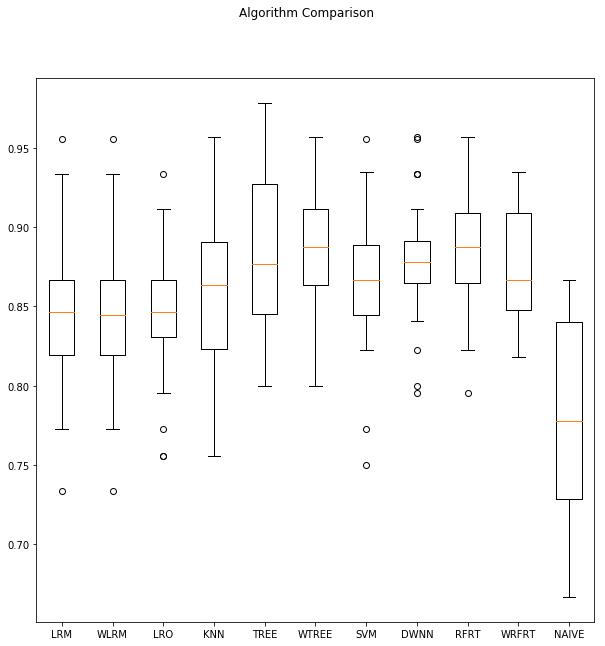

In [27]:
# Plotando boxplot dos resultados
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [32]:
#lazy = KNeighborsClassifier(n_neighbors = 5, weights="distance", metric="manhattan")

In [18]:
model10.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=24,
            verbose=0, warm_start=False)

In [19]:
model10.score(X_test, y_test)

0.8431372549019608